In [ ]:
import os
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D
import matplotlib.pyplot as plt
import librosa
from PIL import Image
# import librosa     ## For audio datasets
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU

In [ ]:
Images = os.listdir('/content/drive/MyDrive/ForCoding/faces/Train')

Labels = pd.read_csv('/content/drive/MyDrive/ForCoding/faces/train.csv')

In [ ]:
Images

['18457.jpg',
 '18408.jpg',
 '18448.jpg',
 '18382.jpg',
 '18379.jpg',
 '18530.jpg',
 '18464.jpg',
 '18474.jpg',
 '18385.jpg',
 '184.jpg',
 '18384.jpg',
 '18458.jpg',
 '18454.jpg',
 '18404.jpg',
 '18422.jpg',
 '18468.jpg',
 '18462.jpg',
 '18471.jpg',
 '18394.jpg',
 '18410.jpg',
 '1848.jpg',
 '18409.jpg',
 '18386.jpg',
 '18507.jpg',
 '18415.jpg',
 '18500.jpg',
 '18436.jpg',
 '18523.jpg',
 '18425.jpg',
 '18395.jpg',
 '18518.jpg',
 '18461.jpg',
 '18419.jpg',
 '1843.jpg',
 '18503.jpg',
 '18373.jpg',
 '18378.jpg',
 '18510.jpg',
 '18387.jpg',
 '18446.jpg',
 '18486.jpg',
 '18532.jpg',
 '18498.jpg',
 '18496.jpg',
 '18400.jpg',
 '18501.jpg',
 '18381.jpg',
 '18369.jpg',
 '18380.jpg',
 '18432.jpg',
 '18516.jpg',
 '18393.jpg',
 '18517.jpg',
 '18598.jpg',
 '18661.jpg',
 '1863.jpg',
 '18567.jpg',
 '18608.jpg',
 '18663.jpg',
 '18626.jpg',
 '18538.jpg',
 '18607.jpg',
 '18669.jpg',
 '18589.jpg',
 '18556.jpg',
 '18615.jpg',
 '18546.jpg',
 '1866.jpg',
 '18670.jpg',
 '18572.jpg',
 '18570.jpg',
 '1858.jpg',

In [ ]:
Labels['Class'].value_counts(normalize=True)

Class
MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: proportion, dtype: float64

In [ ]:
Labels['ID'].iloc[0]

'377.jpg'

In [ ]:
list(Labels[Labels['ID']=='377.jpg']['Class'].values)[0]

'MIDDLE'

In [ ]:
data=[]
label=[]
e=0
for i in range(0,len(Images)):
  img=Image.open('/content/drive/MyDrive/ForCoding/faces/Train/'+Images[i])
  img=img.resize((60,60))
  img=np.array(img)
  data.append(img)
  try:
    if list(Labels[Labels['ID']==Images[i]]['Class'].values)[0]=='YOUNG':
      label.append(0)
    elif list(Labels[Labels['ID']==Images[i]]['Class'].values)[0]=='MIDDLE':
      label.append(1)
    else:
      label.append(2)
  except:
    label.append(-1)
print('finish')

finish


In [ ]:
# Number of images without label

print(label.count(-1))

0


In [ ]:
data=np.asarray(data)
label=np.asarray(label)
label=keras.utils.to_categorical(label,num_classes=3)

print(data.shape,label.shape)

(8040, 60, 60, 3) (8040, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.2, random_state=40)

In [ ]:
model = Sequential()
model.add(Conv2D(128, [7,7], padding = 'SAME', input_shape=(60,60,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [7,7], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [3,3], padding = 'same'))
model.add(Conv2D(256, [6,6], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(512, [3,3], padding = 'same'))
model.add(Conv2D(512, [7,7], padding = 'same',activation = 'relu'))
model.add(Conv2D(512, [7,7], padding = 'same'))
model.add(Conv2D(512, [5,5], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(padding = 'same'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

opt = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 60, 60, 128)         │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 256)         │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 512)           │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 512)           │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 512)           │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 74,445,571 (283.99 MB)

 Trainable params: 74,445,571 (283.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train, y_train ,batch_size=64,epochs=25 ,validation_data=(x_test,y_test))

Epoch 1/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 74s 506ms/step - acc: 0.4903 - loss: 6396.5771 - val_acc: 0.5299 - val_loss: 0.9550
Epoch 2/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 315ms/step - acc: 0.5366 - loss: 0.9565 - val_acc: 0.5299 - val_loss: 0.9537
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 44s 340ms/step - acc: 0.5314 - loss: 0.9583 - val_acc: 0.5299 - val_loss: 0.9572
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 325ms/step - acc: 0.5536 - loss: 0.9396 - val_acc: 0.5299 - val_loss: 0.9546
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 344ms/step - acc: 0.5377 - loss: 0.9518 - val_acc: 0.5299 - val_loss: 0.9548
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 325ms/step - acc: 0.5404 - loss: 0.9604 - val_acc: 0.5299 - val_loss: 0.9544
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 35s 344ms/step - acc: 0.5490 - loss: 0.9422 - val_acc: 0.5299 - val_loss: 0.9554
Epoch 8/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 35s 343ms/step - acc: 0.5394 - loss: 0.9576 - val_acc: 0.5299 - val_loss: 0.9544
Epoch 9/25
101/101 ━━━━━━━━━━

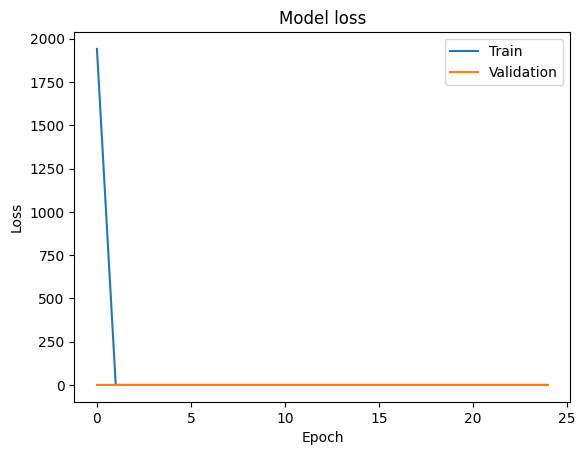

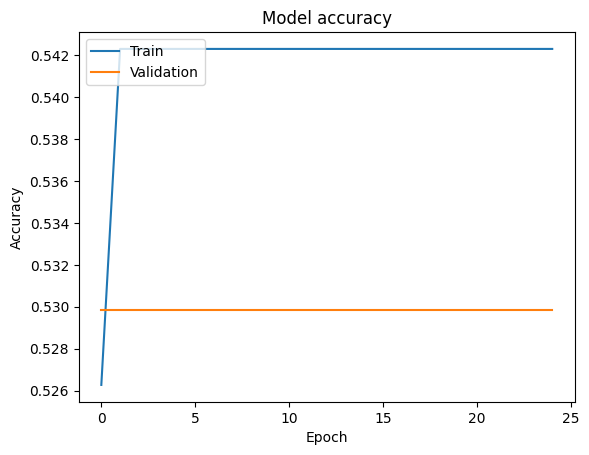

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


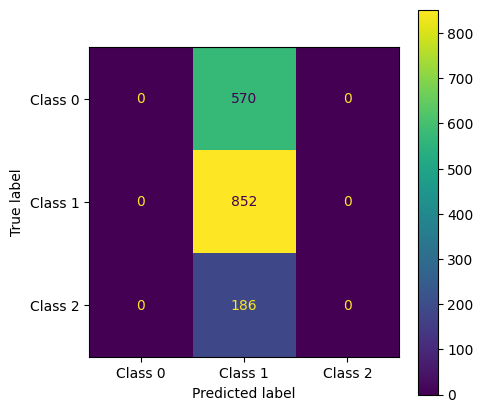

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# The number of classes
num_classes = len(np.unique(true_labels))

# Create labels for display
labels = [f'Class {i}' for i in range(num_classes)]

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
disp.plot(ax=ax)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# گزارش جامع ارزیابی مدل
report = classification_report(true_labels, pred_labels, target_names=labels)
print(report)

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       570
     Class 1       0.53      1.00      0.69       852
     Class 2       0.00      0.00      0.00       186

    accuracy                           0.53      1608
   macro avg       0.18      0.33      0.23      1608
weighted avg       0.28      0.53      0.37      1608



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ذخیره مدل
# model.save('final_model.h5')

# گزارش نهایی
print("مدل با موفقیت آموزش و ذخیره خواهد شد.")

مدل با موفقیت آموزش و ذخیره خواهد شد.
